# Colab to compile a question description generated by MCTest

## Make a copy of this file in Google Drive and Copy-paste the description of the question in the window below:

In [131]:
from ipywidgets import widgets
mctest_desc = widgets.Textarea(value='Copy-Paste',layout={'width': '90%', 'height': '500px'},
    placeholder='Type something', description='Description:'
)
mctest_desc

Textarea(value='Copy-Paste', description='Description:', layout=Layout(height='500px', width='90%'), placehold…

## Upload MCTest file and set the header in the .tex file:

In [149]:
import requests
UtilsMCTest4 = requests.get("https://raw.githubusercontent.com/fzampirolli/mctest/master/topic/UtilsMCTest4.py")
with open('UtilsMCTest4.py', 'w') as writefile:
    writefile.write(UtilsMCTest4.text)
tex_header = r'''
\documentclass[10pt,brazil,a4paper]{exam}
\usepackage[utf8]{inputenc}
\usepackage[brazilian]{babel}
\usepackage[table,xcdraw]{xcolor}
\begin{document}
\pagestyle{empty}
'''

## import functions of MCTest for parametric question:


In [150]:
import UtilsMCTest4

ss = UtilsMCTest4.UtilsMC.questionParametric(mctest_desc.value,[]) # Not multiple-choice question if []
ss = tex_header + '\n\n%%%%%%%%%%%%%%%\n\n' + ss[0] + '\n\n%%%%%%%%%%%%%%%\n\n' + '\end{document}'
# for see test cases:
ss = ss.replace('comment', 'verbatim')

# save question in question.tex
with open('question.tex', 'w') as writefile:
    writefile.write(ss)

questionParametric-00-2020-12-24 14:03:41.792281
questionParametric-01-2020-12-24 14:03:41.792448
questionParametric-01-2020-12-24 14:03:41.792571
questionParametric-02-2020-12-24 14:03:41.793085
questionParametric-02-2020-12-24 14:03:41.793193
questionParametric-03-2020-12-24 14:03:41.793695


## It takes a long time to install the $\LaTeX$ (about 4 min):

In [151]:
!apt-get install texlive-full
!apt-get install texlive-font-utils

Reading package lists... Done
Building dependency tree       
Reading state information... Done
texlive-full is already the newest version (2017.20180305-1).
0 upgraded, 0 newly installed, 0 to remove and 15 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
texlive-font-utils is already the newest version (2017.20180305-2).
0 upgraded, 0 newly installed, 0 to remove and 15 not upgraded.


## Compiles the $\LaTeX$ file to generate the PDF file

In [152]:
!pdflatex 'question.tex'
!rm *.log *.out *.toc *.aux
# for download of pdf:
#from google.colab import files
#files.download('question.pdf')

This is pdfTeX, Version 3.14159265-2.6-1.40.18 (TeX Live 2017/Debian) (preloaded format=pdflatex)
 restricted \write18 enabled.
entering extended mode
(./question.tex
LaTeX2e <2017-04-15>
Babel <3.18> and hyphenation patterns for 84 language(s) loaded.
(/usr/share/texlive/texmf-dist/tex/latex/exam/exam.cls
Document Class: exam 2017/12/17 Version 2.603 by Philip Hirschhorn
(/usr/share/texlive/texmf-dist/tex/latex/base/ifthen.sty)
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2014/09/29 v1.4h Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo)))
(/usr/share/texlive/texmf-dist/tex/latex/base/inputenc.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/utf8.def
(/usr/share/texlive/texmf-dist/tex/latex/base/t1enc.dfu)
(/usr/share/texlive/texmf-dist/tex/latex/base/ot1enc.dfu)
(/usr/share/texlive/texmf-dist/tex/latex/base/omsenc.dfu)))
(/usr/share/texlive/texmf-dist/tex/generic/babel/babel.sty
(/usr/share/texlive/texmf-dist

## Convert PDF file to image and show its contents

Reading package lists... Done
Building dependency tree       
Reading state information... Done
poppler-utils is already the newest version (0.62.0-2ubuntu2.12).
0 upgraded, 0 newly installed, 0 to remove and 15 not upgraded.


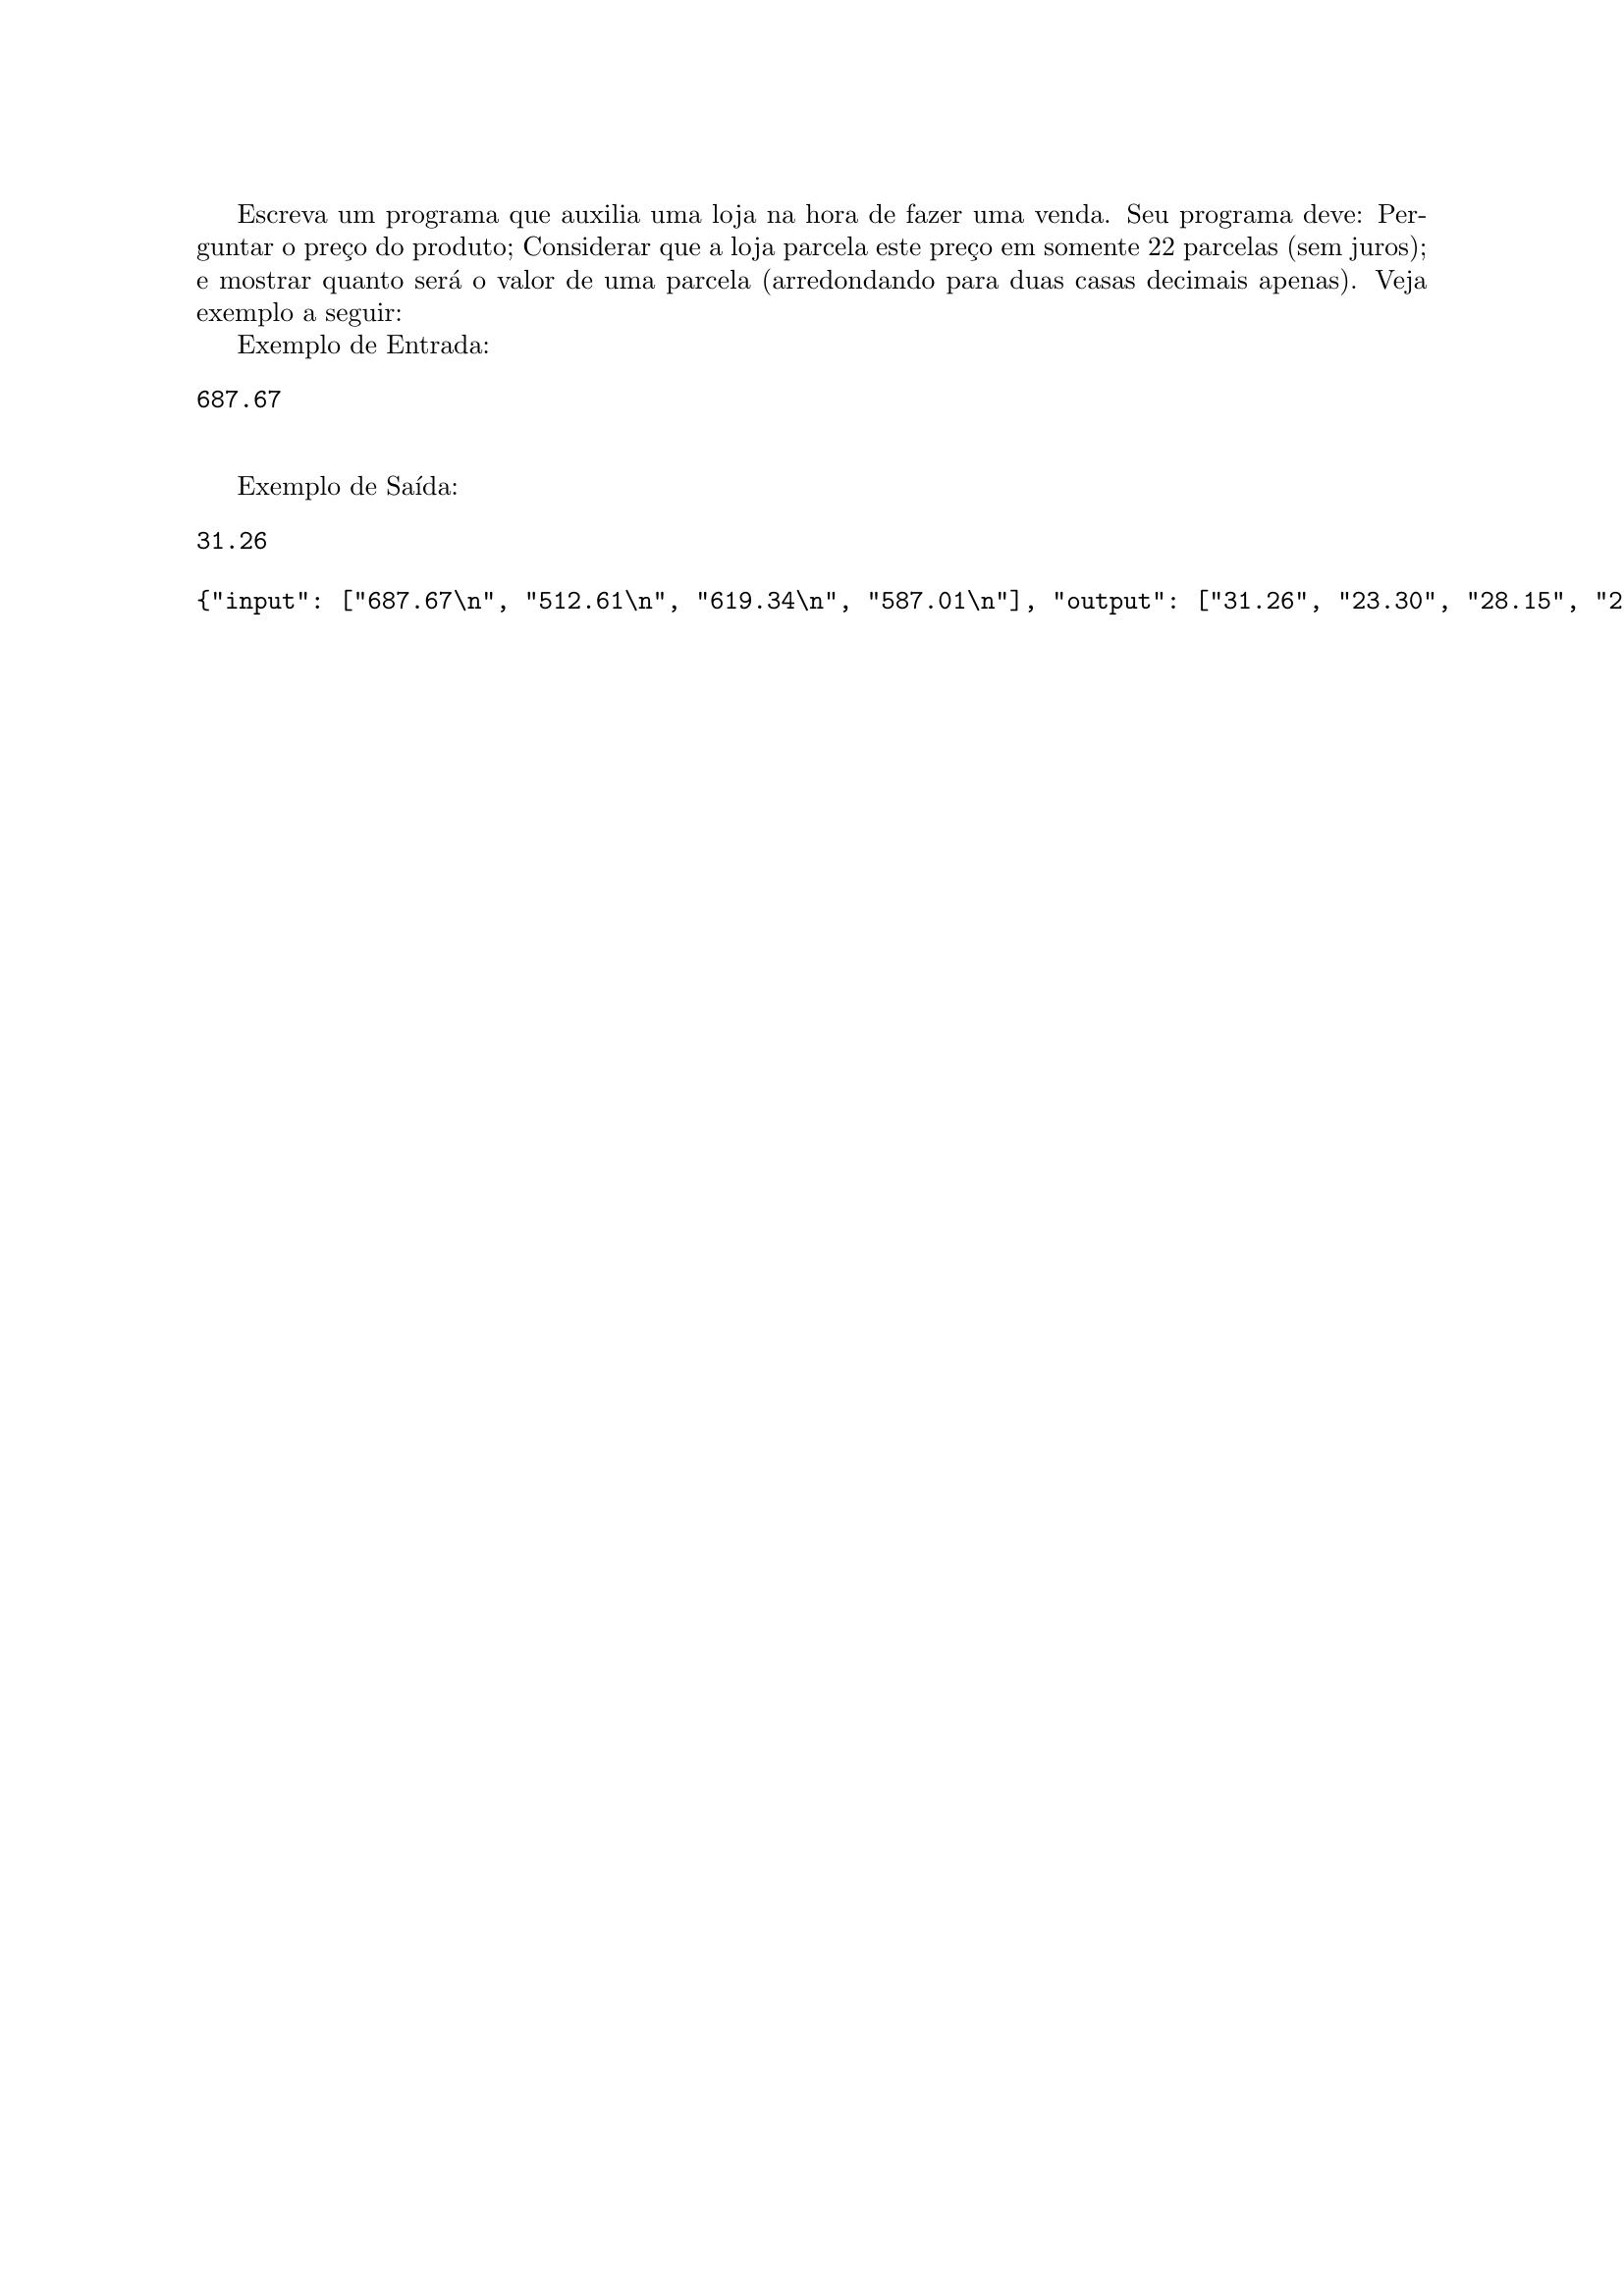

In [153]:
!pip install pdf2image
!apt-get install -y poppler-utils
from pdf2image import convert_from_path
from PIL import Image
images = convert_from_path('question.pdf')
images[0].save('question.jpg', 'JPEG')
from IPython.display import Image
Image("question.jpg", width=800, height=1000)